#### 필수 목표

분석 흐름 개요
- 데이터 EDA
- 데이터 정제 및 데이터 전처리
- 데이터 시각화 및 분석
- 데이터 기반 인사이트 도출

1. [비즈니스 목표 세우기]

2. [사용된 데이터 소스 설명] 출처, 구성, 관측단위, 주요 변수를 소개
- 관측 단위와 기간
    - 관측 단위: Fitbit 사용자(30명) × 활동/수면/심박 데이터, 사용자-일(Day)
    - 기간: 2016년 3월 12일 ~ 2016년 5월 12일(62일)
- 주요 변수 소개: 하드/노말/소프트 유저, 활동날짜()

3. [EDA] 행/열 개수를 제시
- 로딩 직후와 정제 후를 구분해서 행·열 개수(shape)와 결측치 개수를 각각 보고하기

4. [EDA] 분석할 데이터의 컬럼 타입과 기술통계(min/median/mean/max, 결측치 수)를 제시

5. [전처리 과정] 결측치/이상치/전처리 처리 규칙을 수립·실행하고, 처리 이유를 작성

6. [주요 분석제시 및 시각화] 한개 혹은 여러개의 기준 컬럼을 두고 집계함수로 비교분석 후 시각화

7. [인사이트 제시 ]최소 1개 이상의 인사이트를 수치/그래프/그림/해석으로 제시

#### 심화 목표

1. EDA를 더 다양한 형식(산점도, 박스플롯  등)으로 나타내보기

2. 사용자별 평균 활동량(예: mean_steps)을 기준으로 상위 20% / 하위 20% 그룹을 만들어 주요 지표(걸음수, 칼로리, 비활동 시간 등)를 비교

3. 월별/분기별 평균 활동량을 계산해 장기 추세(증가·감소)와 계절성(예: 여름·겨울 차이)을 파악

4. 요일별·시간대별 평균 Steps(또는 활동 비율)를 히트맵으로 그려 피크 시간대를 파악하고, 주중 vs 주말 차이를 분석


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df34 = pd.read_csv("../data/dailyActivity_merged34.csv")
# df45 = pd.read_csv("../data/dailyActivity_merged45.csv")

# df35 = pd.concat([df34, df45])
# df = df35.copy()

In [2]:
df = pd.read_csv("../data/dailyActivity_merged_fin_sum.csv")
act = df.copy()

act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
act.shape
#(1373, 15)

In [ ]:
# 전체 정보
act.info()

In [ ]:
# 전체 데이터 기술통계
act.describe()

In [ ]:
# 결측치 확인
act.isnull().sum()

In [ ]:
#ID 종류 확인
act['Id'].nunique()

In [ ]:
# Id별 데이터 개수 확인
act['Id'].value_counts().describe()

In [ ]:
act['ActivityDate'].value_counts()

In [4]:
# 날짜 타입 변환
act["ActivityDate"] = pd.to_datetime(act["ActivityDate"])
act1 = act.copy() # 날짜 타입 변환까지 한 백업본

act = act.sort_values("ActivityDate")

# 요일 변수 생성
act["Weekday"] = act["ActivityDate"].dt.day_name()

# 활동강도 합산 지표 생성
act["TotalActiveMinutes"] = (act["VeryActiveMinutes"]
                            + act["FairlyActiveMinutes"]
                            + act["LightlyActiveMinutes"])

act.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday,TotalActiveMinutes
213,1927972279,2016-05-12,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,966,1383,Thursday,0
1364,8877689391,2016-05-12,8064,6.12,6.12,0.0,1.82,0.04,4.25,0.0,23,1,137,770,1849,Thursday,161
758,4558609924,2016-05-12,6307,4.17,4.17,0.0,0.00,0.00,4.17,0.0,0,0,247,736,1452,Thursday,247
671,4388161847,2016-05-12,3369,2.59,2.59,0.0,0.00,0.00,2.59,0.0,0,0,108,825,1623,Thursday,108
171,1844505072,2016-05-12,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,711,665,Thursday,0


In [11]:
# 요일 순서 고정
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
act['DayofWeek'] = pd.Categorical(act['Weekday'], categories=day_order, ordered=True)
print(act['DayofWeek'].value_counts())

DayofWeek
Tuesday      201
Saturday     199
Friday       199
Wednesday    198
Thursday     195
Sunday       193
Monday       188
Name: count, dtype: int64


In [54]:
# 미착용일 조건 정의
non_wear_cond = (
   (act["TotalSteps"] == 0) &
   (act["TotalDistance"] == 0) &
   (act["SedentaryMinutes"] >= 1380)   # 하루 23시간 이상 앉아있음
)

# 미착용일 제외
act = act.loc[~non_wear_cond].copy()

In [5]:
# 마일을 킬로미터로 변환
MILE_TO_KM = 1.60934
distance_cols = [
    "TotalDistance",
    "TrackerDistance",
    "LoggedActivitiesDistance",
    "VeryActiveDistance",
    "ModeratelyActiveDistance",
    "LightActiveDistance",
    "SedentaryActiveDistance",
]
for col in distance_cols:
    act[f"{col}_km"] = act[col] * MILE_TO_KM

In [ ]:
# 한글 폰트 설정(윈도우 추천)

import matplotlib.font_manager as fm

candidates = ["Malgun Gothic", "맑은 고딕", "NanumGothic", "굴림", "Gulim"]
installed = {f.name for f in fm.fontManager.ttflist}

for font in candidates:
    if font in installed:
        plt.rcParams["font.family"] = font
        break

plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 깨짐 방지

print("선택된 폰트:", plt.rcParams["font.family"])

선택된 폰트: ['Malgun Gothic']


---

시각화

무엇을 분석할 것인가?
기준: 사용자(입력 차이)
- 자동기록자/수동입력자
    - a. 완전 자동 기록자
    - b. 자동기록자 + 수동입력자
    - c. 완전 수동입력자

- 왜? 자동입력자와 수동입력자의 차이를 분석하고 싶어서. 

무엇을 분석할 것인가?
- 활동 날짜
- 강도: 현재는 거리만 비교할 수 있음

주의점: 수동입력-불확실함, 거리만 존재-불확실함, 불확실함의 결정체. 

C:\Users\dcf10\AppData\Local\Temp\ipykernel_8280\3414519465.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=log_type_act, x='UserCategory', order=category_order, palette='Set2')


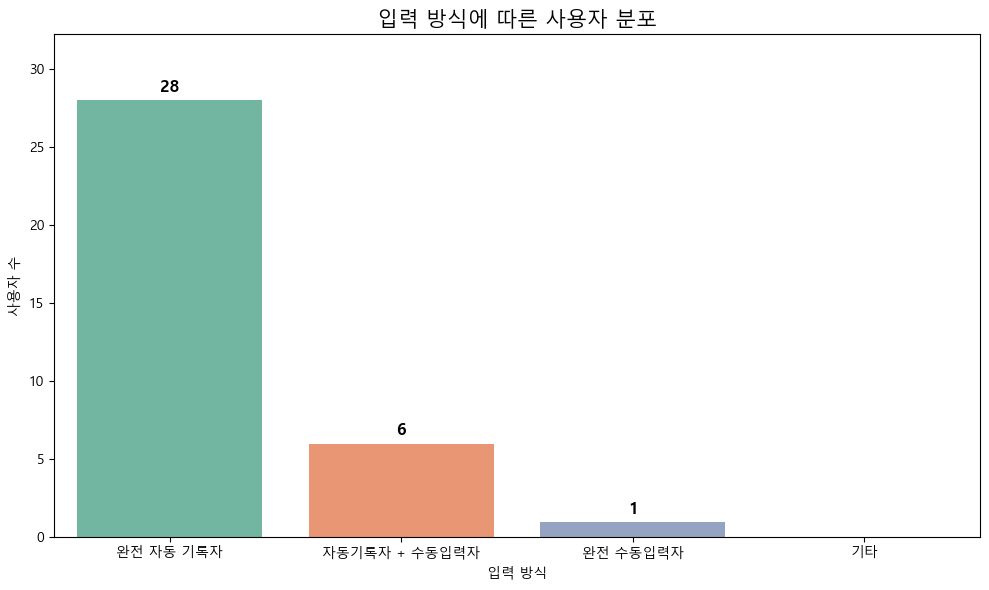

In [55]:
# 1. 사용자별 자동(Tracker) vs 수동(Logged) 거리 합계 계산
log_type_act = act.groupby('Id').agg({
    'TrackerDistance_km': 'sum',
    'LoggedActivitiesDistance_km': 'sum'
}).reset_index()

# 2. 기록 유형 분류 함수 정의
def classify_log_behavior(row):
    tracker = row['TrackerDistance_km']
    manual = row['LoggedActivitiesDistance_km']
    
    # a. 완전 자동 기록자: 기기 기록은 있고, 수동 입력은 0인 경우
    if tracker > 0 and manual == 0:
        return '완전 자동 기록자'
    
    # b. 자동기록자 + 수동입력자: 둘 다 기록이 있는 경우
    elif tracker > 0 and manual > 0:
        return '자동기록자 + 수동입력자'
    # c. 완전 수동입력자: 기기 기록은 0이고, 수동 입력만 있는 경우
    elif tracker == 0 and manual > 0:
        return '완전 수동입력자'
    
    else:
        return '기타'

# 3. 그룹 적용
log_type_act['UserCategory'] = log_type_act.apply(classify_log_behavior, axis=1)

# 5. 세로 막대 그래프 시각화
plt.figure(figsize=(10, 6))

# X축 순서 지정 (데이터에 없는 그룹도 축에 표시하기 위함)
category_order = ['완전 자동 기록자', '자동기록자 + 수동입력자', '완전 수동입력자', '기타']

# 그래프 그리기
ax = sns.countplot(data=log_type_act, x='UserCategory', order=category_order, palette='Set2')

plt.title('입력 방식에 따른 사용자 분포', fontsize=15)
plt.xlabel('입력 방식')
plt.ylabel('사용자 수')

# countplot은 데이터프레임에 개수가 미리 계산되어 있지 않으므로, 
# value_counts()로 최대값을 구해와서 범위를 설정합니다.
if not log_type_act.empty:
    max_count = log_type_act['UserCategory'].value_counts().max()
    plt.ylim(0, max_count * 1.15) # 15% 여유 공간 확보

# 기존의 ax.annotate 대신 ax.bar_label을 사용하면 
# 좌표 계산 없이 자동으로 중앙에 예쁘게 숫자가 달립니다.
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

1. 완전 자동 기록을 사용하는 이용자가 80% 비율이다. 
2. 완전 수동입력자는 1명이며, 데이터를 확인해봤을 경우 수동 기록 거리가 일률적이므로 데이터의 가치가 떨어지는 편이다. 
3. 자동 기록과 수동 입력을 혼용하는 이용자는 약 17%이다. 

- 완전 자동 기록자의 비율이 높으므로 이들을 토대로 데이터 분석을 진행하는 편이 좋다.
- 하지만 개인별 맞춤 분석을 위해서 혼용 이용자도 분석할 수 있다. 

C:\Users\dcf10\AppData\Local\Temp\ipykernel_8280\2527838664.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=manual_users_only, x='Id', y='TotalCount', palette=colors, alpha=0.6)


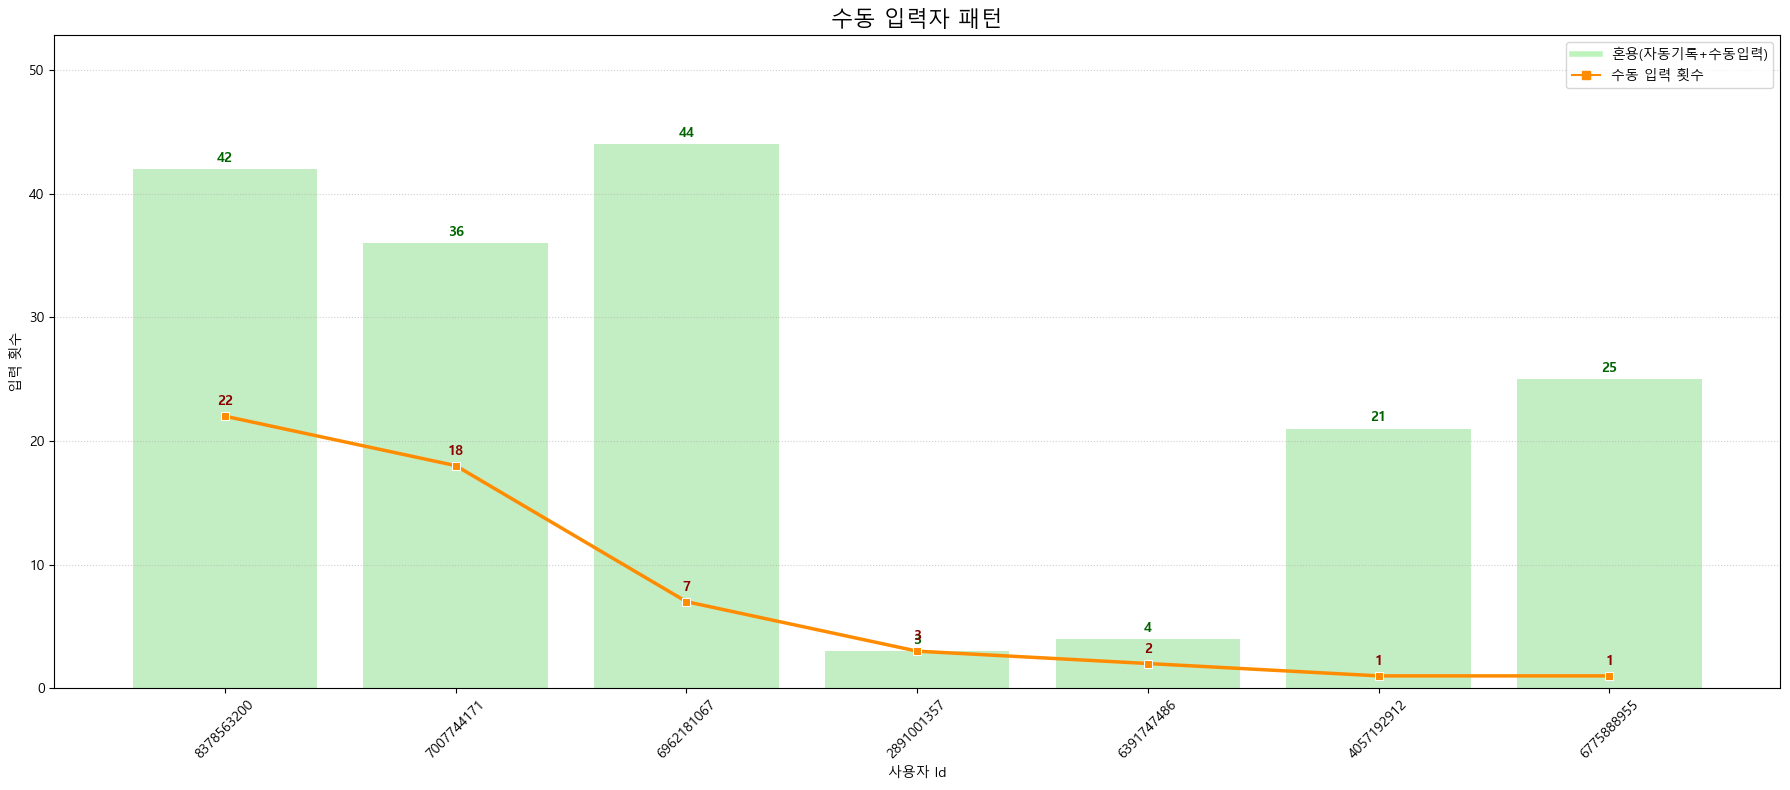

In [56]:
from matplotlib.lines import Line2D

# 1. 데이터 집계
# (1) 총 기록 횟수 (Id별 전체 행 수)
total_counts = act.groupby('Id').size().reset_index(name='TotalCount')

# (2) 수동 입력 횟수 (거리 > 0인 경우만)
# 주의: 거리가 0인 수동 입력(예: 웨이트)은 제외되므로, 
# '완전 수동 사용자'라도 막대(전체)와 선(거리>0)의 높이가 다를 수 있습니다.
manual_counts = act[act['LoggedActivitiesDistance_km'] > 0].groupby('Id').size().reset_index(name='ManualCount')

# (3) 자동 기록 총합 (완전 수동 입력자를 찾아내기 위함)
tracker_sums = act.groupby('Id')['TrackerDistance_km'].sum().reset_index(name='TotalTrackerDist')

# 2. 데이터 병합
manual_users_only = pd.merge(manual_counts, total_counts, on='Id', how='inner')
manual_users_only = pd.merge(manual_users_only, tracker_sums, on='Id', how='left')

# [추가] 완전 수동 입력자 여부 판별
manual_users_only['IsPureManual'] = manual_users_only['TotalTrackerDist'] == 0

# 시각화 준비 (정렬)
manual_users_only['Id'] = manual_users_only['Id'].astype(str)
manual_users_only = manual_users_only.sort_values('ManualCount', ascending=False)

# --- [누락된 부분 추가] 색상 리스트 정의 ---
colors = ['lightgreen'] * len(manual_users_only)

# 3. 그래프 그리기
plt.figure(figsize=(18, 8))

# (A) 막대 그래프
ax = sns.barplot(data=manual_users_only, x='Id', y='TotalCount', palette=colors, alpha=0.6)

# (B) 선 그래프
sns.lineplot(data=manual_users_only, x='Id', y='ManualCount', color='darkorange', marker='s', linewidth=2.5, label='Manual Entry Frequency')

# --- [핵심 수정 1] Y축 범위 자동 설정 ---
# 데이터 최댓값 기준 1.2배 확보
max_val = manual_users_only['TotalCount'].max()
plt.ylim(0, max_val * 1.2) 

# --- [핵심 수정 2] 막대 그래프 값 레이블 ---
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, color='darkgreen', weight='bold')

# --- [선 그래프 값 레이블] ---
# 위치를 데이터 크기에 비례하여 조정 (max_val * 0.02)
for i, val in enumerate(manual_users_only['ManualCount']):
    ax.text(i, val + (max_val * 0.02), int(val), ha='center', color='darkred', weight='bold')

# 4. 그래프 꾸미기
plt.title('수동 입력자 패턴', fontsize=16)

# 범례 설정
legend_elements = [Line2D([0], [0], color='lightgreen', lw=4, label='혼용(자동기록+수동입력)', alpha=0.6),
                   Line2D([0], [0], color='darkorange', marker='s', label='수동 입력 횟수')]
plt.legend(handles=legend_elements)
plt.xlabel('사용자 Id')
plt.ylabel('입력 횟수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

1. 수동 입력 이용자 7명을 추려내 자동 기록과 수동 입력을 비교했다.
2. 수동 입력이 총 입력 횟수의 50% 이상인 이용자는 3명이며, 그중 1명은 총 입력 횟수가 적었다.

총 정리
- 기기 이용자 35명 중 수동 입력 기능을 사용하는 이용자는 약 17.1%이다.
- 수동 입력 기능을 적극적으로 사용하는 이용자(총 기록 횟수의 50% 이상)의 비율은 약 8.6%이다. 
- 모수가 적지만 수동 입력 기능을 적극적으로 사용하는 이용자가 10%를 넘지 않음을 알 수 있었다. 

완전 자동 기록자와 혼용 이용자의 무슨 차이를 비교하고 싶은가?
- 일단 수동 입력 가능한 것은 거리 밖에 없음. 
- 혼용 이용자 패턴: 언제, 얼마나 수동 입력을 했는지 : 필요한 정보인가? 아니다. 개인적 호기심은 빼자. 

---

그렇다면 지금 해야할 것은 무엇인가? 
- 현재 진행한 요일 별/날짜별 총 활동 시간 이외
- 날짜별 사용자 수를 점검해보니 데이터 분석의 정확도를 높이기 위해선 3월 31일 이전 데이터는 제외해볼 것을 생각해야 함
- 날짜별 총 걸음수, 날짜별 강도별 활동 시간, 날짜별 소모 칼로리 가능함


---

날짜별 데이터로 알 수 있는 점 
- 그날 무슨 사건이 발생했는가
- 어떤 사건이 벌어지면 운동량이 갑자기 떨어지는가

C:\Users\dcf10\AppData\Local\Temp\ipykernel_8280\642602249.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_trend = act.groupby('DayofWeek')['TotalActiveMinutes'].mean()


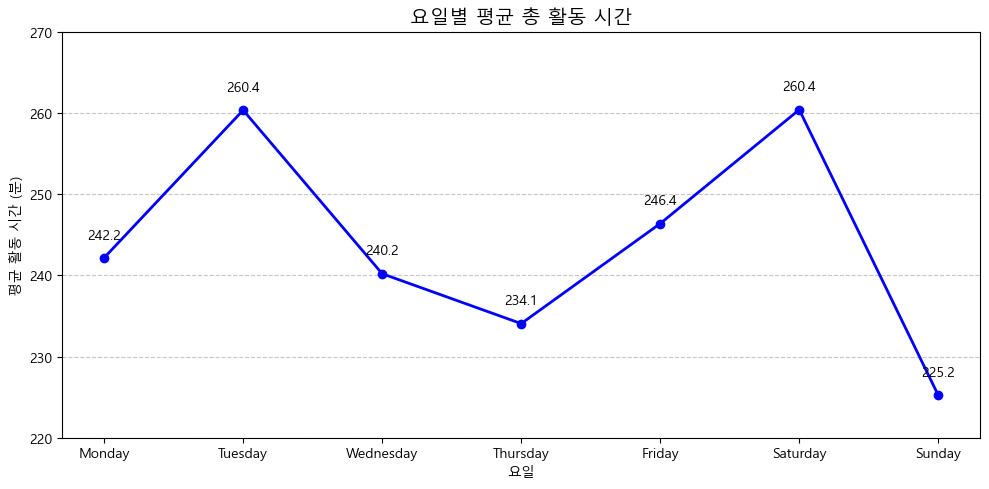

In [65]:
# 2. 요일별 평균 계산
weekly_trend = act.groupby('DayofWeek')['TotalActiveMinutes'].mean()

# [핵심 수정] 계산된 데이터를 요일 순서대로 '재정렬'합니다.
# 이 과정이 없으면 알파벳 순서로 그려질 수 있습니다.
weekly_trend = weekly_trend.reindex(day_order)

# 3. 선 그래프 그리기
plt.figure(figsize=(10, 5))

# Pandas 내장 plot 대신 plt.plot을 직접 쓰면 커스터마이징이 더 쉽습니다.
plt.plot(weekly_trend.index, weekly_trend.values, marker='o', color='b', linewidth=2, linestyle='-')

# 4. 그래프 꾸미기
plt.title('요일별 평균 총 활동 시간', fontsize=14) # 제목 수정 (일주일 별 -> 요일별)
plt.xlabel('요일')
plt.ylabel('평균 활동 시간 (분)')
plt.ylim(bottom=220, top=270) # bottom=200: 200부터 시작

# 값 레이블 추가 (선택 사항)
for i, v in enumerate(weekly_trend.values):
    # NaN(결측치)이 아닐 때만 표시
    if pd.notnull(v):
        plt.text(i, v + 2, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7) # 격자 추가로 가독성 높임
plt.tight_layout()
plt.show()

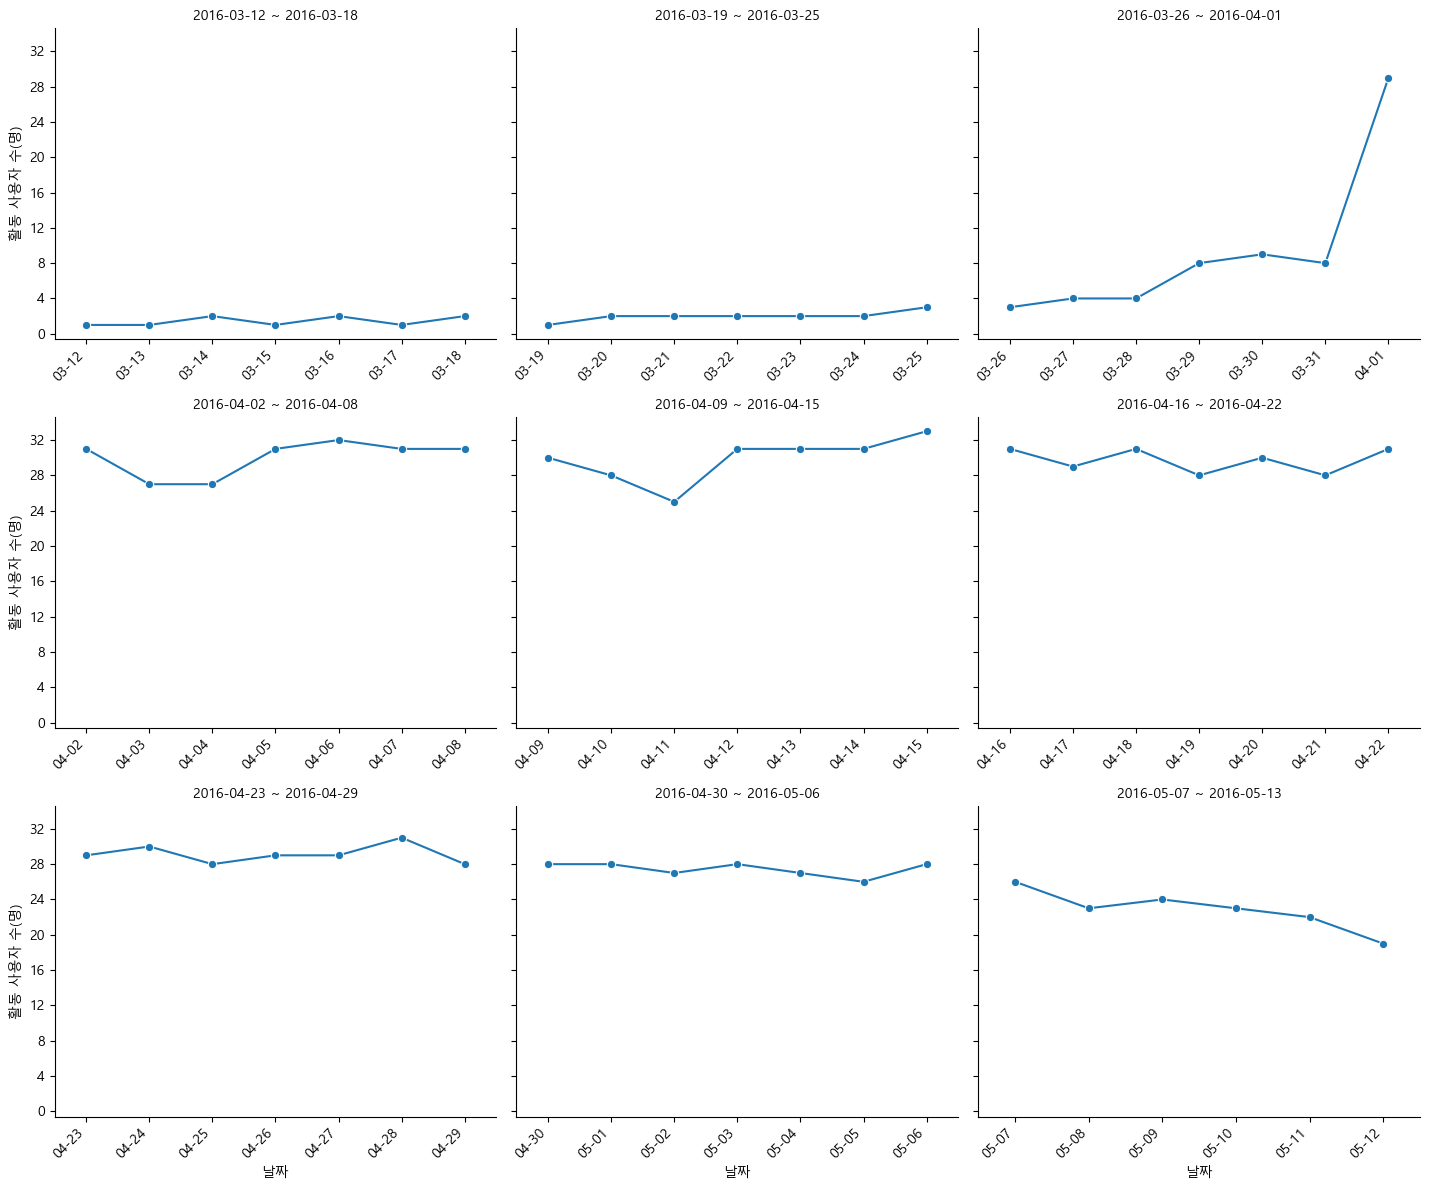

In [64]:
# [전제] act 데이터프레임에 'ActivityDate', 'DateRange', 'Id' 컬럼이 이미 생성되어 있다고 가정
import matplotlib.dates as mdates

# 1. 날짜별 ID 개수 집계 (기존 동일)
daily_user_counts = act.groupby(['ActivityDate', 'DateRange'])['Id'].nunique().reset_index(name='UserCount')
ordered_weeks = daily_user_counts.sort_values('ActivityDate')['DateRange'].unique()

# 2. 격자형 시각화 (기존 동일)
g = sns.relplot(
    data=daily_user_counts, 
    x='ActivityDate', 
    y='UserCount',
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line',
    marker='o',
    height=4, 
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': False} 
)

# 3. 그래프 꾸미기
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    
    # [수정] Timedelta 대신 단순 숫자 사용
    if ax.get_lines():
        dates = ax.get_lines()[0].get_xdata()
        if len(dates) > 0:
            # Matplotlib에서 1.0은 1일을 의미합니다.
            # 0.5 = 반나절
            buffer = 0.5 
            ax.set_xlim(dates.min() - buffer, dates.max() + buffer)

    # Y축 정수 설정
    from matplotlib.ticker import MaxNLocator
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

g.set_titles("{col_name}")
g.set_axis_labels("날짜", "활동 사용자 수(명)")

plt.tight_layout()
plt.show()

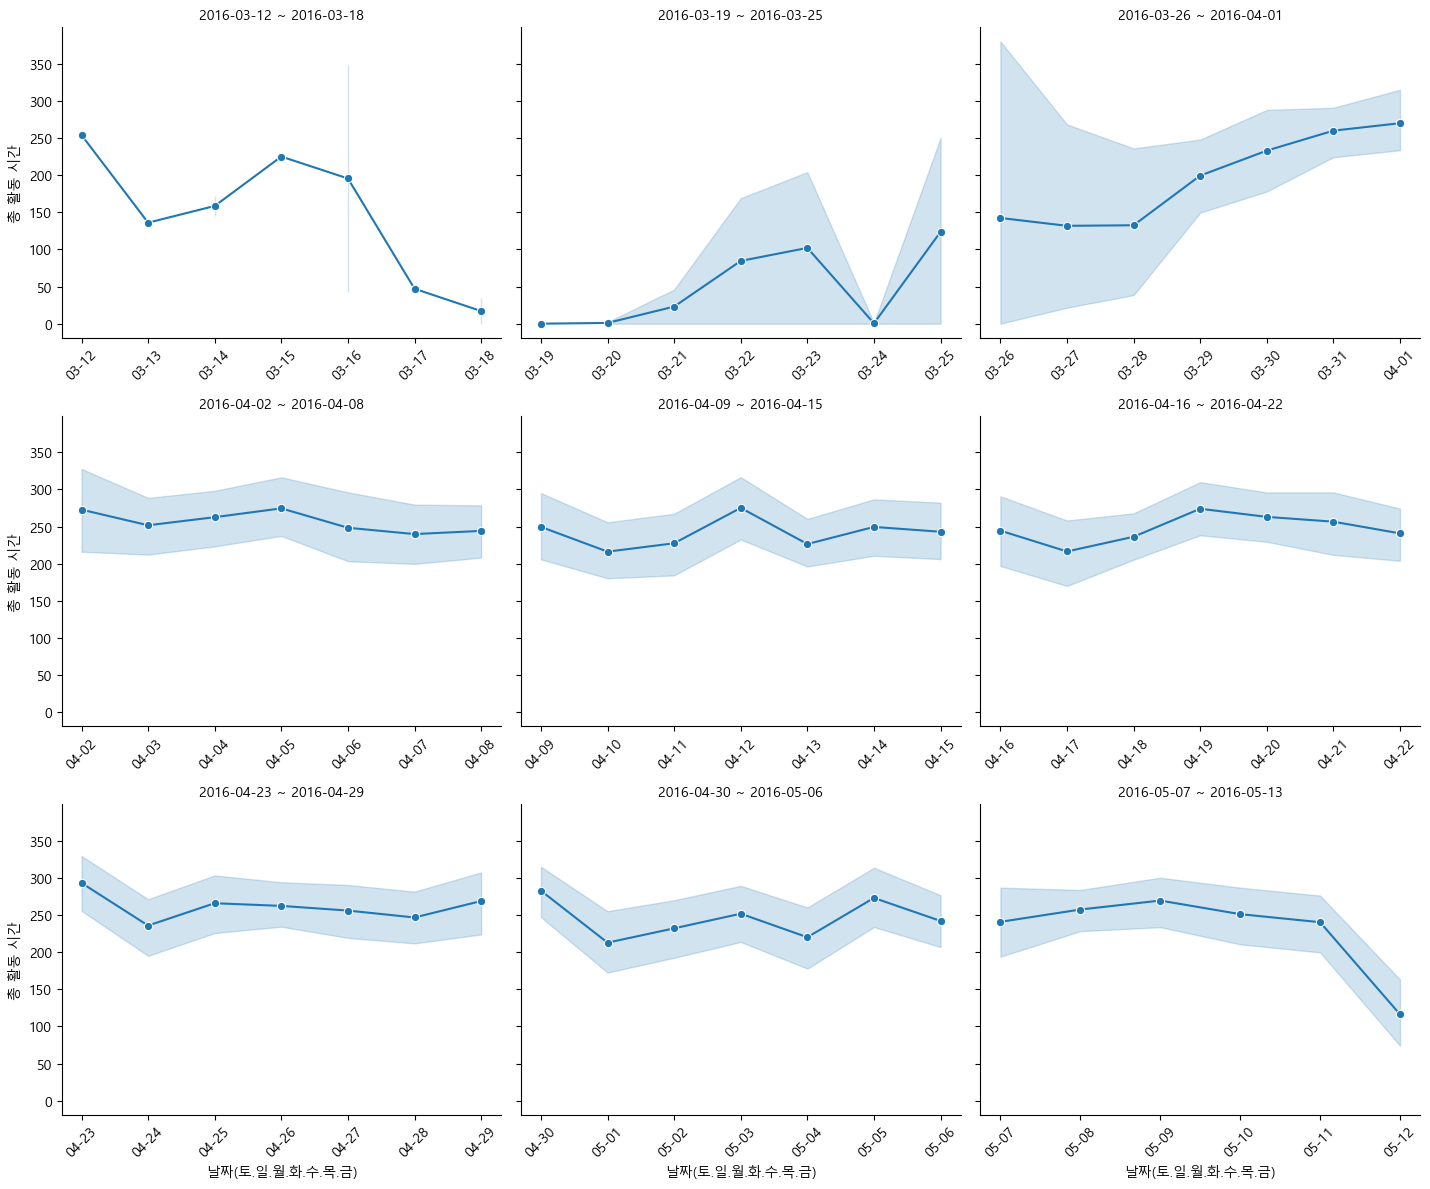

In [60]:
# 날짜 범위(Period) 생성 로직
# 데이터의 가장 첫 날을 기준으로 7일씩 끊어서 범위를 만듭니다.
import matplotlib.dates as mdates
start_point = act['ActivityDate'].iloc[0] # 정렬이 되어 있으므로 첫 번째 행이 가장 빠른 날

# 시작일로부터 몇 주 지났는지 계산 (벡터화 연산)
act['WeekNum'] = (act['ActivityDate'] - start_point).dt.days // 7

# 주차별 시작일, 종료일 계산
week_starts = start_point + pd.to_timedelta(act['WeekNum'] * 7, unit='D')
week_ends = week_starts + pd.to_timedelta(6, unit='D')

# 'YYYY-MM-DD ~ YYYY-MM-DD' 형태의 문자열 생성
act['DateRange'] = week_starts.dt.strftime('%Y-%m-%d') + ' ~ ' + week_ends.dt.strftime('%Y-%m-%d')

# 그래프에 표시할 순서 추출 (이미 날짜순 정렬된 상태라 unique()만 해도 순서가 맞음)
ordered_weeks = act['DateRange'].unique()

# 3. 격자형(FacetGrid) 시각화 수정
g = sns.relplot(
    data=act, 
    x='ActivityDate', 
    y='TotalActiveMinutes', 
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line', 
    marker='o',
    height=4, 
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': False} 
)

# 4. 그래프 제목 및 라벨 다듬기
for ax in g.axes.flat:
    # X축 날짜를 '월-일' 형태로 표시 (예: 03-12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    
    # 날짜가 너무 많으면 2일 간격으로 표시 (선택 사항)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    
    # 날짜 라벨 회전
    plt.setp(ax.get_xticklabels(), rotation=45)

# 3. 그래프 제목 및 라벨 정리
g.set_titles("{col_name}")
g.set_axis_labels("날짜(토.일.월.화.수.목.금)", "총 활동 시간")

plt.tight_layout()
plt.show()

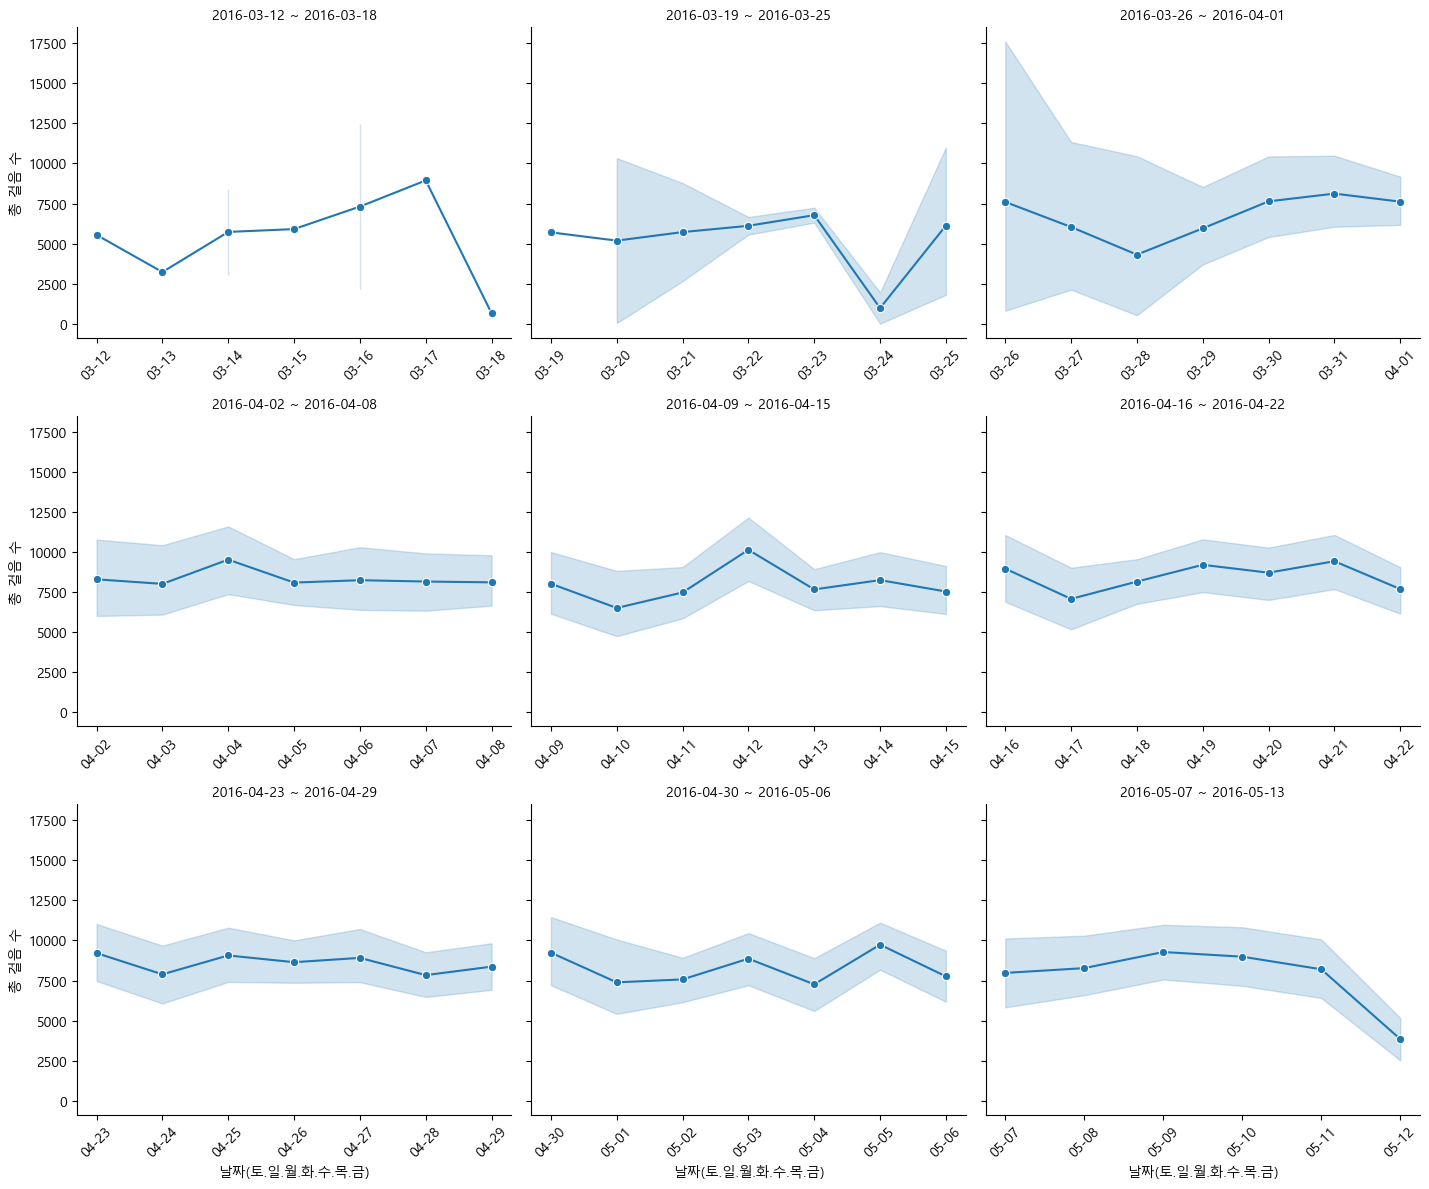

In [66]:
# 날짜 범위(Period) 생성 로직
# 데이터의 가장 첫 날을 기준으로 7일씩 끊어서 범위를 만듭니다.
import matplotlib.dates as mdates
start_point = act['ActivityDate'].iloc[0] # 정렬이 되어 있으므로 첫 번째 행이 가장 빠른 날

# 시작일로부터 몇 주 지났는지 계산 (벡터화 연산)
act['WeekNum'] = (act['ActivityDate'] - start_point).dt.days // 7

# 주차별 시작일, 종료일 계산
week_starts = start_point + pd.to_timedelta(act['WeekNum'] * 7, unit='D')
week_ends = week_starts + pd.to_timedelta(6, unit='D')

# 'YYYY-MM-DD ~ YYYY-MM-DD' 형태의 문자열 생성
act['DateRange'] = week_starts.dt.strftime('%Y-%m-%d') + ' ~ ' + week_ends.dt.strftime('%Y-%m-%d')

# 그래프에 표시할 순서 추출 (이미 날짜순 정렬된 상태라 unique()만 해도 순서가 맞음)
ordered_weeks = act['DateRange'].unique()

# 3. 격자형(FacetGrid) 시각화 수정
g = sns.relplot(
    data=act, 
    x='ActivityDate', 
    y='TotalSteps', 
    col='DateRange',
    col_order=ordered_weeks,
    col_wrap=3,
    kind='line', 
    marker='o',
    height=4, 
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': False} 
)

# 4. 그래프 제목 및 라벨 다듬기
for ax in g.axes.flat:
    # X축 날짜를 '월-일' 형태로 표시 (예: 03-12)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    
    # 날짜가 너무 많으면 2일 간격으로 표시 (선택 사항)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    
    # 날짜 라벨 회전
    plt.setp(ax.get_xticklabels(), rotation=45)

# 3. 그래프 제목 및 라벨 정리
g.set_titles("{col_name}")
g.set_axis_labels("날짜(토.일.월.화.수.목.금)", "총 걸음 수")

plt.tight_layout()
plt.show()

In [67]:
# 1. 3월 24일 데이터만 딱 찝어서 추출
target_date = '2016-03-24'
suspect_data = act[act['ActivityDate'] == target_date]

print(f"--- {target_date} 상세 분석 ---")
print(f"1. 기록한 총 사용자 수: {len(suspect_data)}명")
print(f"2. 평균 총 걸음 수: {suspect_data['TotalSteps'].mean():.0f}보")
print(f"3. 평균 활동 시간: {suspect_data['TotalActiveMinutes'].mean():.0f}분")

print("\n--- 개별 사용자 데이터 (범인 찾기) ---")
# 누가 0을 기록했는지, 혹은 다 같이 낮은지 확인
print(suspect_data[['Id', 'TotalSteps', 'TotalActiveMinutes', 'TrackerDistance_km']])

--- 2016-03-24 상세 분석 ---
1. 기록한 총 사용자 수: 2명
2. 평균 총 걸음 수: 979보
3. 평균 활동 시간: 0분

--- 개별 사용자 데이터 (범인 찾기) ---
             Id  TotalSteps  TotalActiveMinutes  TrackerDistance_km
513  4020332650        1951                   0            2.269169
575  4057192912           7                   1            0.016093


Bellabeat(벨라비트): 2013~2014년 크로아티아에서 설립된 여성 건강 및 웰니스 중심의 스마트 웨어러블 기기 및 IT 기업 - 유럽 정황에 영향을 많이 받을 수 있음

주의 깊게 봐야할 날짜
- 3월 14일, 17일, 18일, 19일, 20일, 24일
- 5월 12일
- 4월은 전체적으로 평탄했음


2016년 3월
- 3월 15일: 이세돌 기사와 알파고의 최종 5국
- 3월 22일: 2016년 브뤼셀 폭탄 테러

표
- 3월 12일부터 19일까지 데이터 수가 2종류만 있음

총 활동 시간으로 구분짓기는 했으나 강도별 활동시간 그래프를 그려보면 또 다른 그림이 나오지 않을까? 